In [13]:
import numpy as np
import pandas as pd

df = pd.read_csv('students.csv')




In [14]:
print(df.head())
print(df.info())
print(df.describe())


   RollNo   Name  Maths  Science  English  Computer
0     101   Aman     78       85       67        90
1     102   Riya     45       55       60        58
2     103   Neha     88       92       81        95
3     104  Rahul     30       40       35        45
4     105  Karan     66       70       72        68
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   RollNo    5 non-null      int64 
 1   Name      5 non-null      object
 2   Maths     5 non-null      int64 
 3   Science   5 non-null      int64 
 4   English   5 non-null      int64 
 5   Computer  5 non-null      int64 
dtypes: int64(5), object(1)
memory usage: 372.0+ bytes
None
           RollNo      Maths   Science    English   Computer
count    5.000000   5.000000   5.00000   5.000000   5.000000
mean   103.000000  61.400000  68.40000  63.000000  71.200000
std      1.581139  23.765521  21.33776  1

In [15]:
df['total_marks'] = df[['Maths','Science','English','Computer']].sum(axis=1)
df['Average_marks'] = df['total_marks']/4


In [16]:
topper = df.loc[df['total_marks'].idxmax()]
print("Topper Student")
print(topper)

Topper Student
RollNo            103
Name             Neha
Maths              88
Science            92
English            81
Computer           95
total_marks       356
Average_marks    89.0
Name: 2, dtype: object


In [17]:
fail_stu = df[
    (df['Maths'] < 35) |
    (df['Science'] < 35) |
     (df['English'] < 35) |
     (df['Computer'] < 35)
]
print("Students Failed")
print(fail_stu)

Students Failed
   RollNo   Name  Maths  Science  English  Computer  total_marks  \
3     104  Rahul     30       40       35        45          150   

   Average_marks  
3           37.5  


In [18]:
subjects = ['Maths','Science','English','Computer']
for sub in subjects:
    print(sub, "Average =", np.mean(df[sub]))


Maths Average = 61.4
Science Average = 68.4
English Average = 63.0
Computer Average = 71.2


In [19]:
df.set_index('RollNo',inplace = True)

In [20]:
df['result'] = np.where(df['Average_marks'] >= 40, 'Pass', 'Fail')
print(df[['Name','Average_marks','result']])


         Name  Average_marks result
RollNo                             
101      Aman           80.0   Pass
102      Riya           54.5   Pass
103      Neha           89.0   Pass
104     Rahul           37.5   Fail
105     Karan           69.0   Pass


In [21]:
sorted_df = df.sort_values(by='Average_marks', ascending=False)
print(sorted_df[['Name','Average_marks']])


         Name  Average_marks
RollNo                      
103      Neha           89.0
101      Aman           80.0
105     Karan           69.0
102      Riya           54.5
104     Rahul           37.5


# Graph

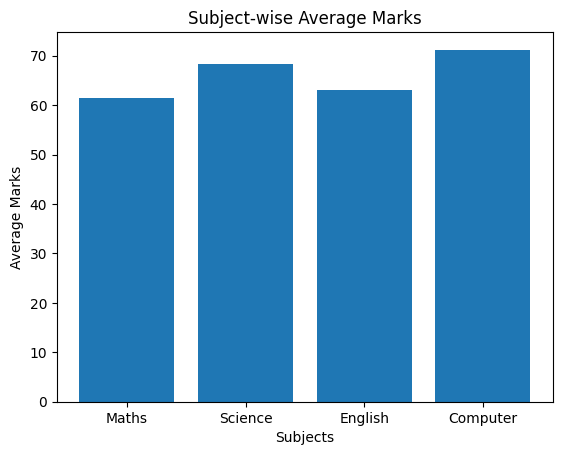

In [22]:
import matplotlib.pyplot as plt
import numpy as np

subjects = ['Maths','Science','English','Computer']
avg_marks = [np.mean(df[sub]) for sub in subjects]

plt.figure()
plt.bar(subjects, avg_marks)
plt.xlabel("Subjects")
plt.ylabel("Average Marks")
plt.title("Subject-wise Average Marks")
plt.show()


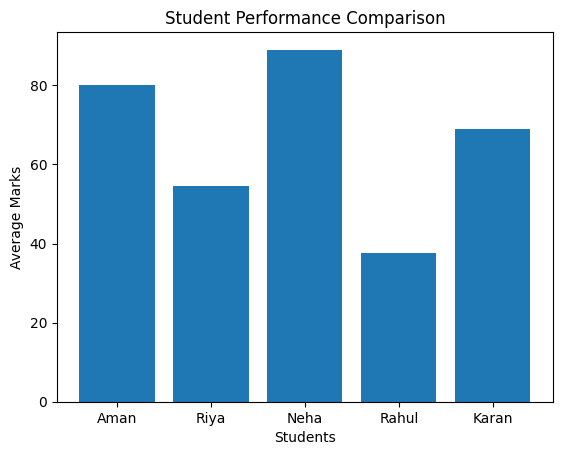

In [23]:
plt.figure()
plt.bar(df['Name'], df['Average_marks'])
plt.xlabel("Students")
plt.ylabel("Average Marks")
plt.title("Student Performance Comparison")
plt.show()


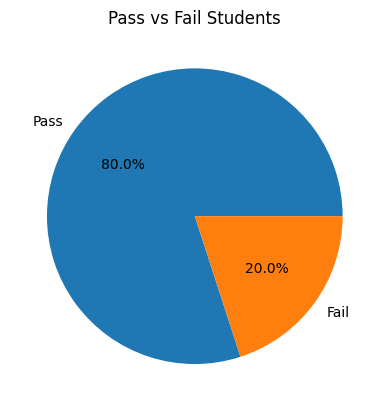

In [24]:
result_count = df['result'].value_counts()

plt.figure()
plt.pie(result_count, labels=result_count.index, autopct='%1.1f%%')
plt.title("Pass vs Fail Students")
plt.show()
